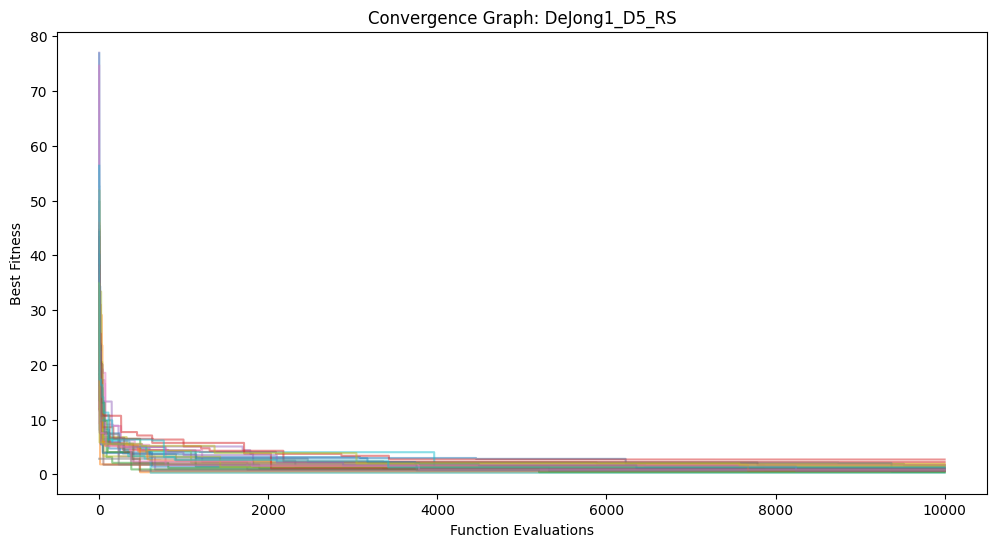

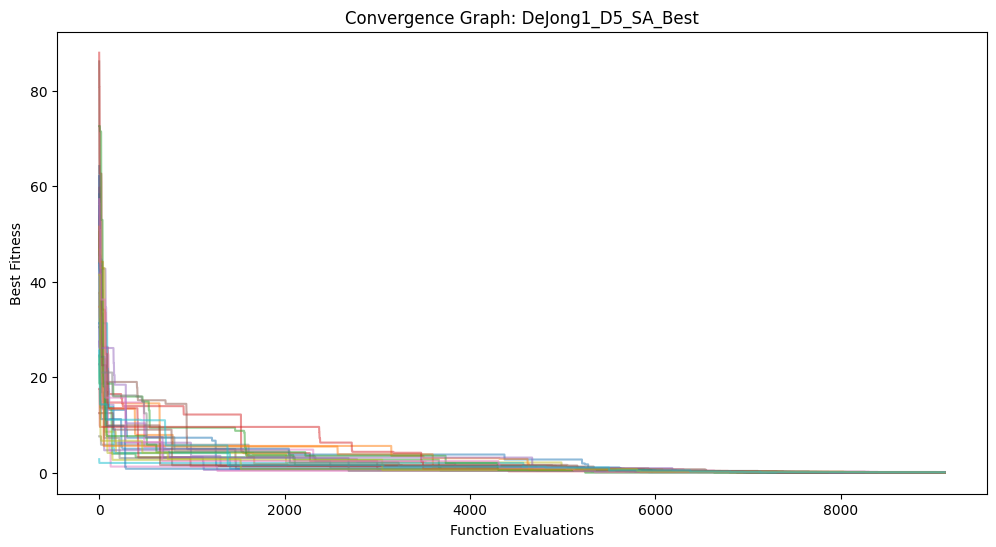

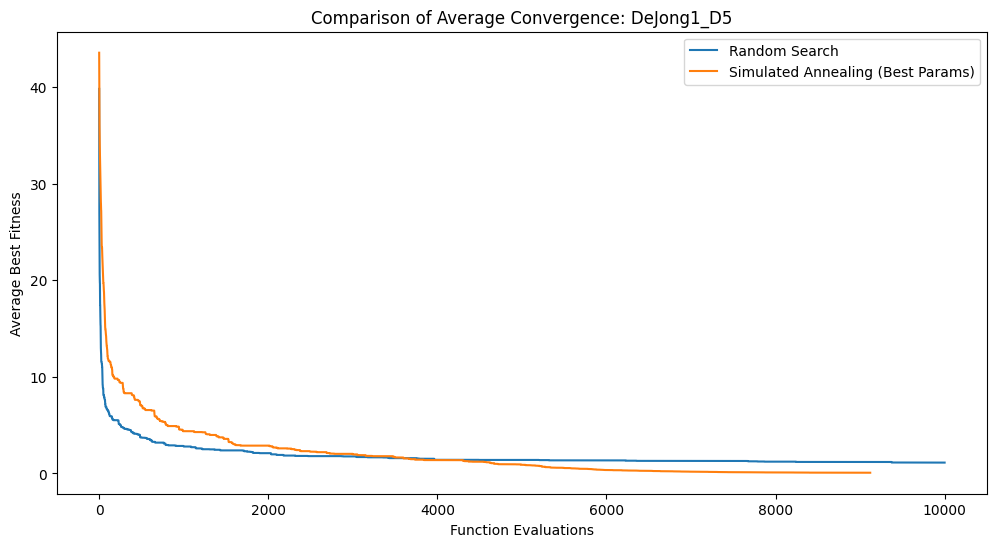

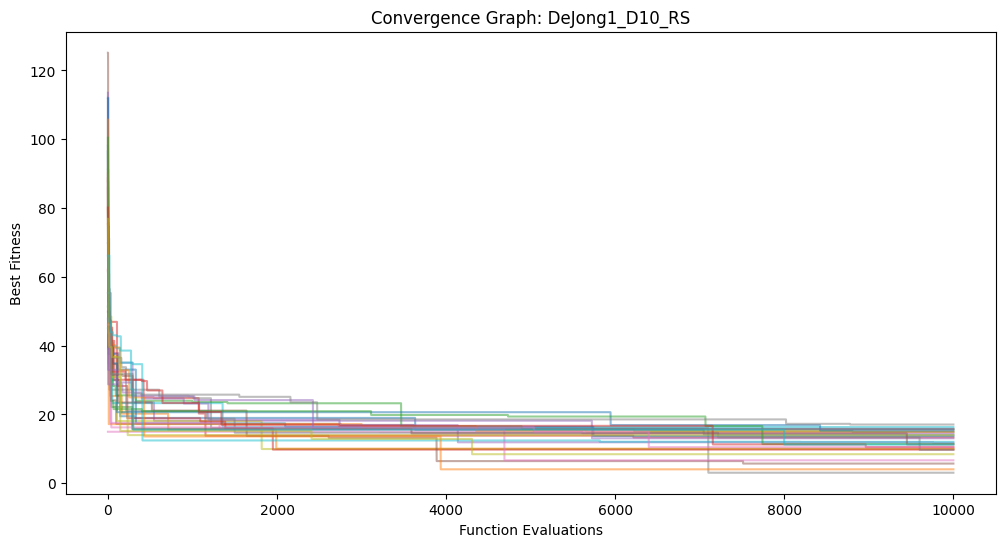

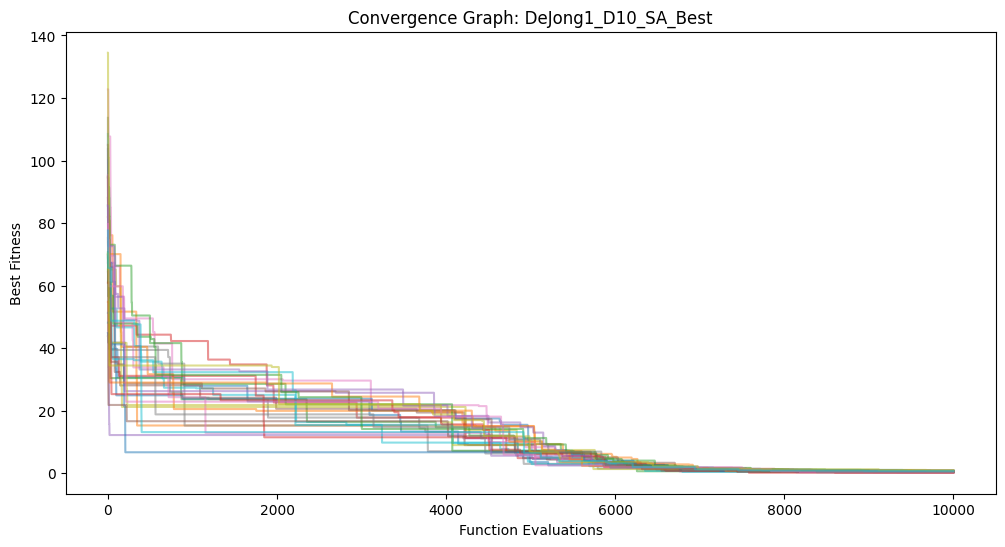

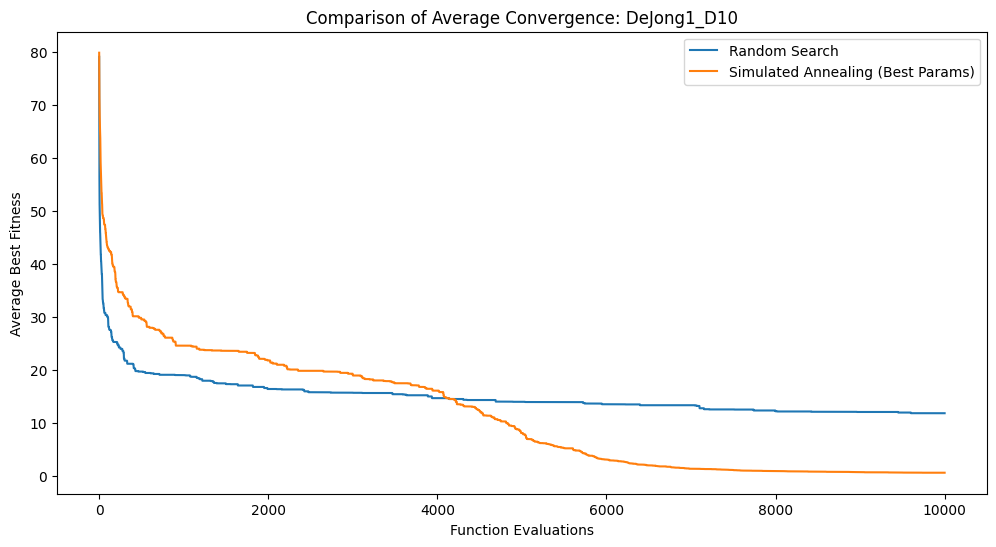

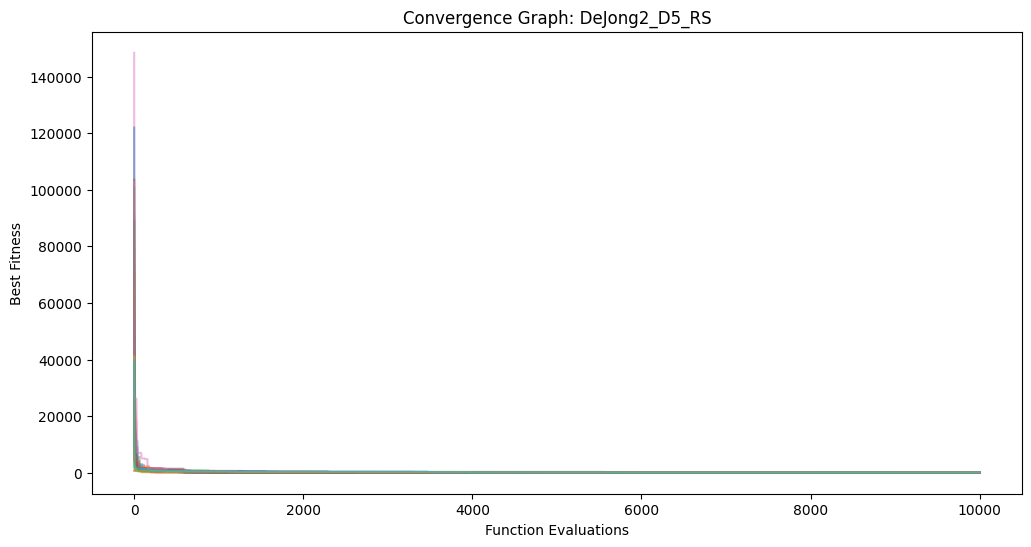

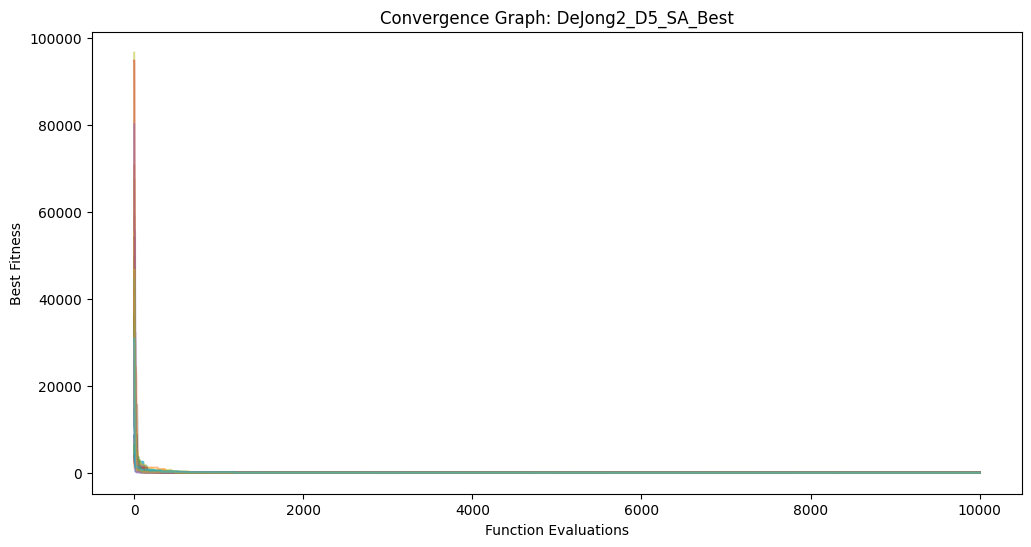

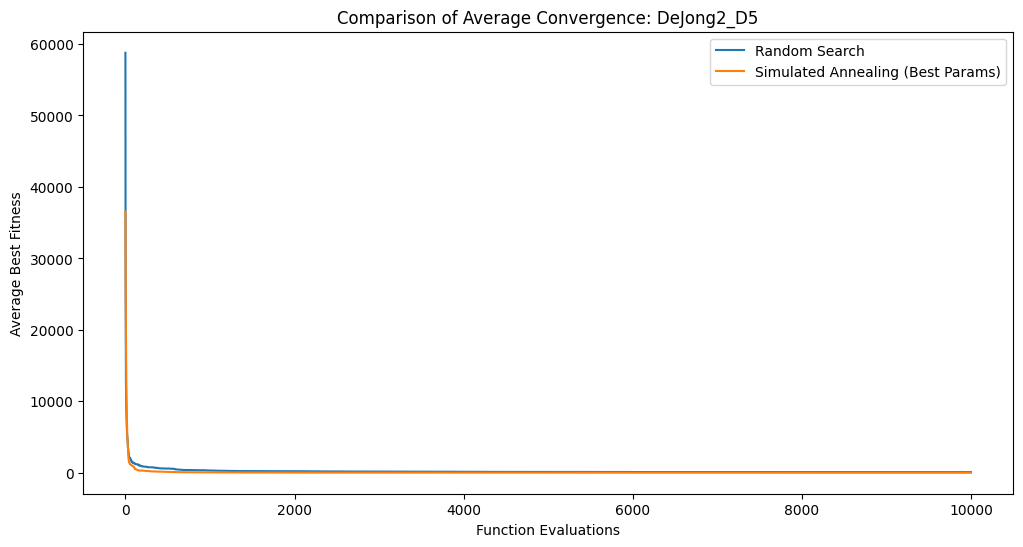

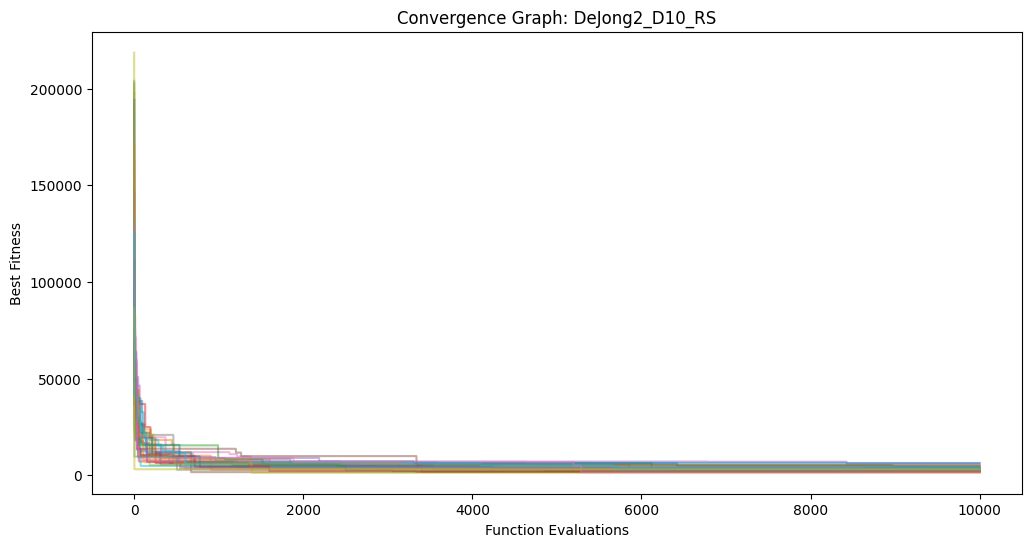

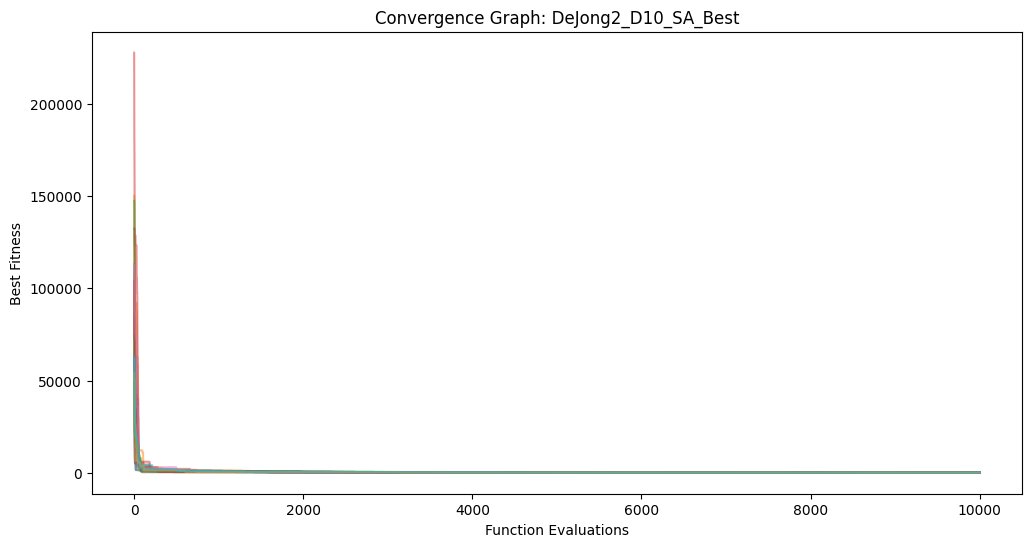

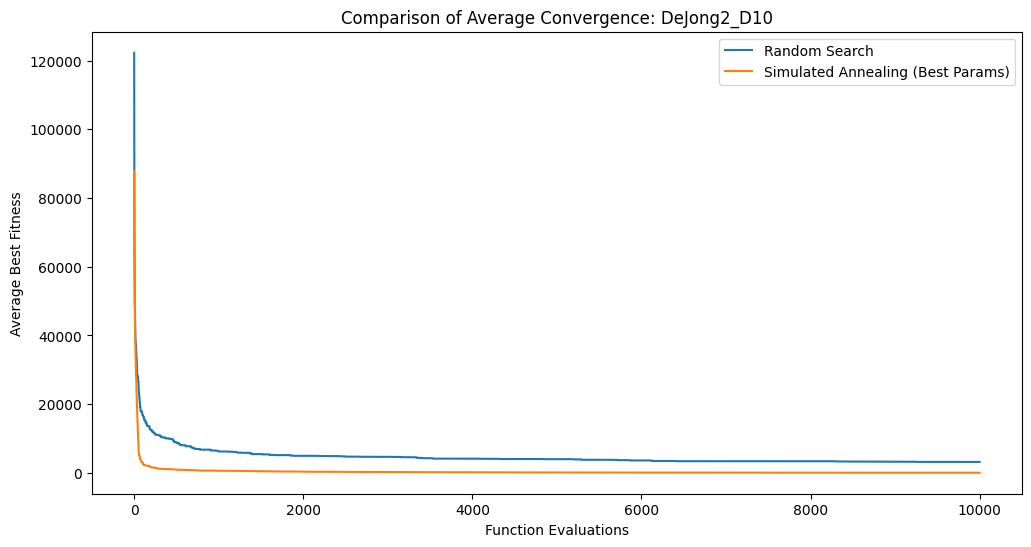

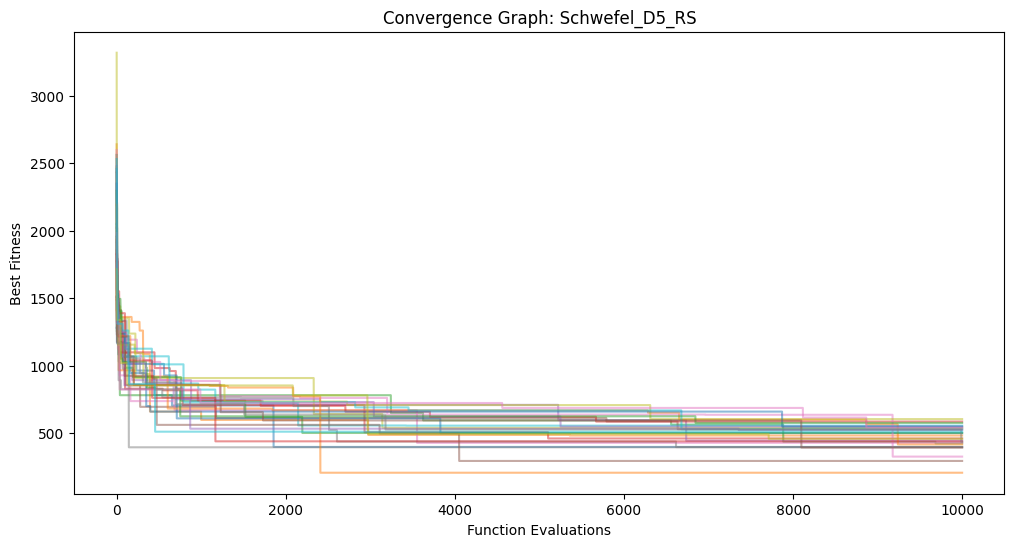

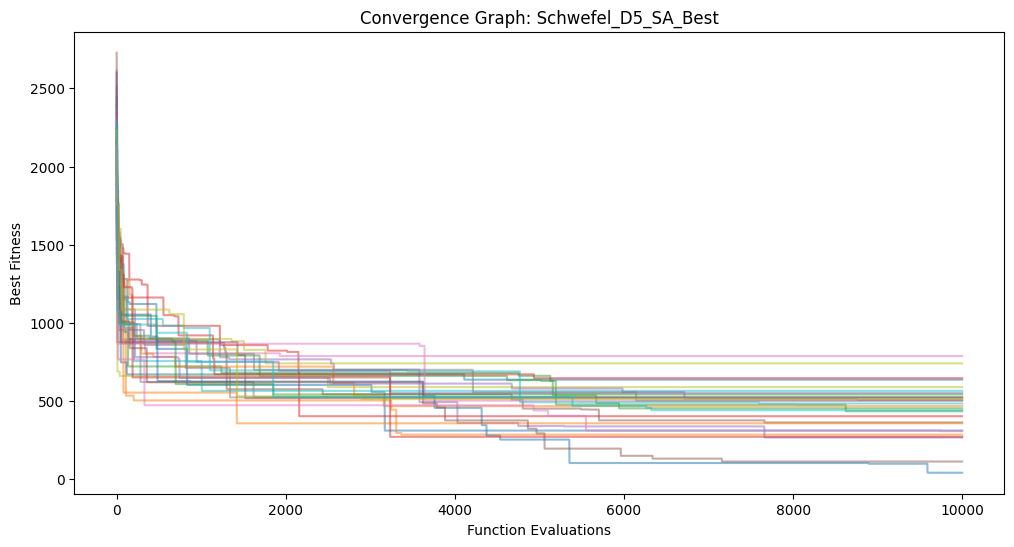

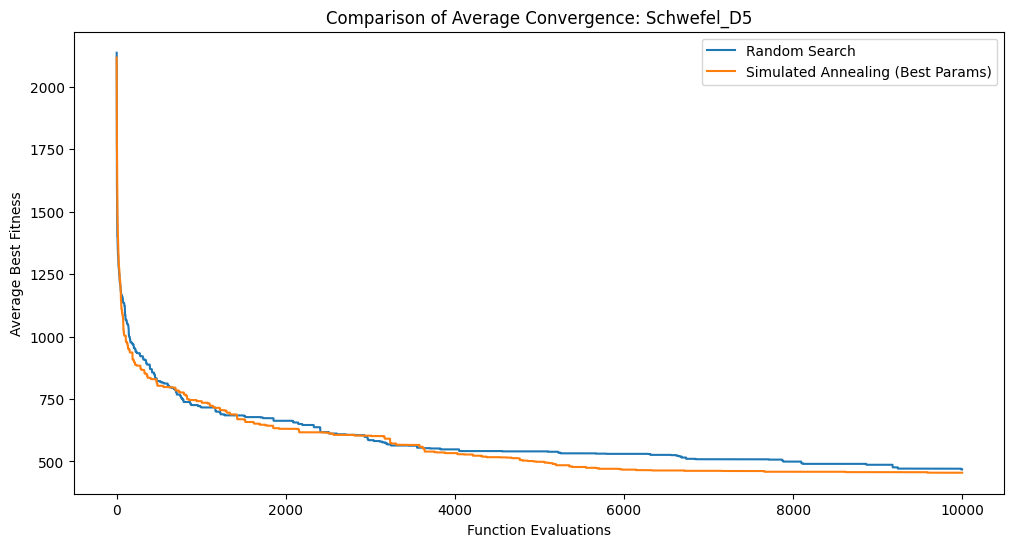

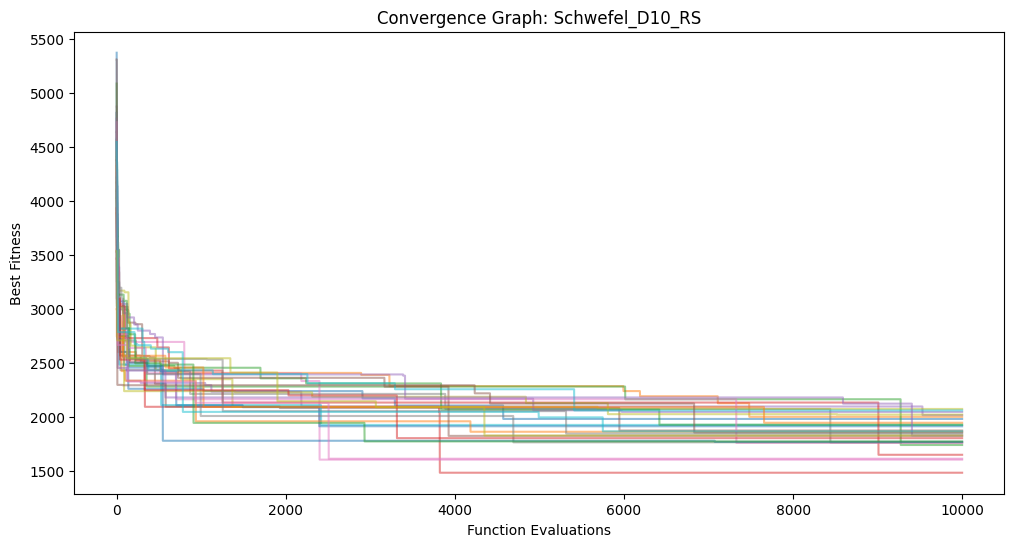

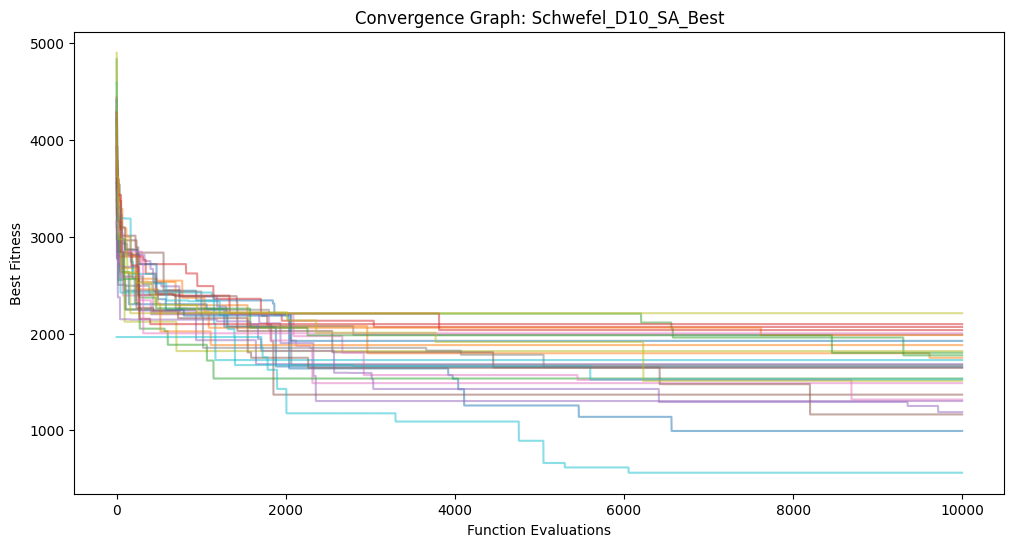

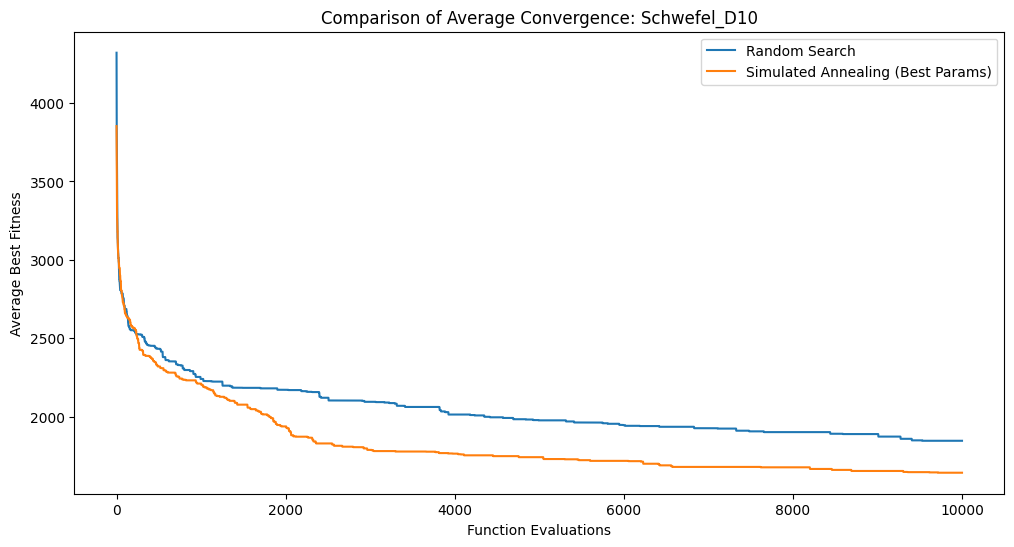

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd

def dejong1_function(x):
    return np.sum(x**2)

def dejong2_function(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

def schwefel_function(x):
    return 418.9829 * len(x) - np.sum(x * np.sin(np.sqrt(np.abs(x))))

def random_search(function, dimension, bounds, max_tier):
    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for _ in range(max_tier):
        candidate_solution = np.random.uniform(low=bounds[0], high=bounds[1], size=dimension)
        fitness = function(candidate_solution)

        if fitness < best_fitness:
            best_fitness = fitness
            best_solution = candidate_solution

        fitness_history.append(best_fitness)

    return best_solution, best_fitness, fitness_history

def simulated_annealing(function, dimension, bounds, max_fes, cooling_decr, max_temp, min_temp, nt):
    best_solution = None
    best_fitness = float('inf')
    init_solution = np.random.uniform(low=bounds[0], high=bounds[1], size=dimension)

    candidate_solution = init_solution
    fitness = function(candidate_solution)
    current_temp = max_temp
    fes_count = 0

    fitness_history = []

    while fes_count < max_fes and current_temp > min_temp:
        for _ in range(nt):
            if fes_count >= max_fes:
                break

            new_solution = candidate_solution + np.random.uniform(-0.1*(bounds[1]-bounds[0]), 0.1*(bounds[1]-bounds[0]), size=dimension)
            new_solution = np.clip(new_solution, bounds[0], bounds[1])
            new_fitness = function(new_solution)
            fes_count += 1

            if new_fitness < fitness or np.random.rand() < np.exp((fitness - new_fitness) / current_temp):
                candidate_solution = new_solution
                fitness = new_fitness

            if fitness < best_fitness:
                best_solution = candidate_solution
                best_fitness = fitness

            fitness_history.append(best_fitness)

        current_temp *= cooling_decr

    return best_solution, best_fitness, fitness_history

# Parameters for tuning (10 combinations)
parameter_combinations = [
    (1000, 0.01, 0.95, 10),
    (1000, 0.01, 0.98, 20),
    (1000, 0.01, 0.99, 50),
    (1000, 0.05, 0.95, 10),
    (1000, 0.05, 0.98, 20),
    (1000, 0.05, 0.99, 50),
    (1000, 0.1, 0.95, 10),
    (1000, 0.1, 0.98, 20),
    (1000, 0.1, 0.99, 50),
    (5000, 0.1, 0.95, 10),
    (5000, 0.1, 0.98, 20),
    (5000, 0.1, 0.99, 50),
    (5000, 0.01, 0.95, 10),
    (5000, 0.01, 0.98, 20),
    (5000, 0.01, 0.99, 50),
    (5000, 0.05, 0.95, 10),
    (5000, 0.05, 0.98, 20),
    (5000, 0.05, 0.99, 50),
    (10000, 1, 0.95, 10),
    (10000, 1, 0.98, 20),
    (10000, 1, 0.99, 50),
    (10000, 0.01, 0.95, 10),
    (10000, 0.01, 0.98, 20),
    (10000, 0.01, 0.99, 50),
    (10000, 0.05, 0.95, 10),
    (10000, 0.05, 0.98, 20),
    (10000, 0.05, 0.99, 50),
    (5000, 0.01, 0.98, 30),
    (3666.666667, 0.03, 0.976666667, 25),
    (2944.444445, 0.043333333, 0.971111111, 23),
]

num_runs = 30
max_fes = 10000

# Experiment setup
dimensions = [5, 10]
bounds_dejong = [-5, 5]
bounds_schwefel = [-500, 500]
functions = [dejong1_function, dejong2_function, schwefel_function]
function_names = ['DeJong1', 'DeJong2', 'Schwefel']

# Running experiments
results = {}
best_params = []
statistics = []

for func, func_name in zip(functions, function_names):
    for dimension in dimensions:
        bounds = bounds_schwefel if func_name == 'Schwefel' else bounds_dejong

        # Random Search
        fitness_histories_rs = []
        best_fitness_rs_runs = []
        for _ in range(num_runs):
            _, best_fitness, fitness_history = random_search(func, dimension, bounds, max_fes)
            fitness_histories_rs.append(fitness_history)
            best_fitness_rs_runs.append(best_fitness)

        results[f'{func_name}_D{dimension}_RS'] = fitness_histories_rs

        # Calculate statistics for Random Search
        stats_rs = {
            'Algorithm': 'Random Search',
            'Function': func_name,
            'Dimension': dimension,
            'Min': np.min(best_fitness_rs_runs),
            'Max': np.max(best_fitness_rs_runs),
            'Mean': np.mean(best_fitness_rs_runs),
            'Median': np.median(best_fitness_rs_runs),
            'StdDev': np.std(best_fitness_rs_runs)
        }
        statistics.append(stats_rs)

        # Simulated Annealing with parameter tuning
        best_fitness_sa = float('inf')
        best_params_sa = None
        best_fitness_histories_sa = None
        
        for max_temp, min_temp, cooling_decr, nt in parameter_combinations:
            fitness_histories_sa = []
            best_fitness_sa_runs = []
            for _ in range(num_runs):
                _, best_fitness, fitness_history = simulated_annealing(func, dimension, bounds, max_fes, cooling_decr, max_temp, min_temp, nt)
                fitness_histories_sa.append(fitness_history)
                best_fitness_sa_runs.append(best_fitness)
                if best_fitness < best_fitness_sa:
                    best_fitness_sa = best_fitness
                    best_params_sa = (max_temp, min_temp, cooling_decr, nt)
                    best_fitness_histories_sa = fitness_histories_sa

            key = f'{func_name}_D{dimension}_SA_T{max_temp}_t{min_temp}_d{cooling_decr}_n{nt}'
            results[key] = fitness_histories_sa

            # Calculate statistics for each SA parameter set
            stats_sa = {
                'Algorithm': 'Simulated Annealing',
                'Function': func_name,
                'Dimension': dimension,
                'MaxTemp': max_temp,
                'MinTemp': min_temp,
                'CoolingDecr': cooling_decr,
                'NumIterations': nt,
                'Min': np.min(best_fitness_sa_runs),
                'Max': np.max(best_fitness_sa_runs),
                'Mean': np.mean(best_fitness_sa_runs),
                'Median': np.median(best_fitness_sa_runs),
                'StdDev': np.std(best_fitness_sa_runs)
            }
            statistics.append(stats_sa)

        # Save the best parameter settings
        best_params.append({
            'Function': func_name,
            'Dimension': dimension,
            'MaxTemp': best_params_sa[0],
            'MinTemp': best_params_sa[1],
            'CoolingDecr': best_params_sa[2],
            'NumIterations': best_params_sa[3],
            'BestFitness': best_fitness_sa
        })

        # Save the best fitness histories for final graph plotting
        results[f'{func_name}_D{dimension}_SA_Best'] = best_fitness_histories_sa

# Save best parameters and statistics to CSV
df_best_params = pd.DataFrame(best_params)
df_best_params.to_csv('best_params4.csv', index=False)

df_statistics = pd.DataFrame(statistics)
df_statistics.to_csv('statistics.csv', index=False)

# Plotting results for Random Search and the best Simulated Annealing parameters
for func_name in function_names:
    for dimension in dimensions:
        key_rs = f'{func_name}_D{dimension}_RS'
        key_sa_best = f'{func_name}_D{dimension}_SA_Best'
        
        # Plot Random Search results
        plt.figure(figsize=(12, 6))
        for run in results[key_rs]:
            plt.plot(run, alpha=0.5)
        plt.xlabel('Function Evaluations')
        plt.ylabel('Best Fitness')
        plt.title(f'Convergence Graph: {key_rs}')
        plt.show()

        # Plot Simulated Annealing results with the best parameters
        plt.figure(figsize=(12, 6))
        for run in results[key_sa_best]:
            plt.plot(run, alpha=0.5)
        plt.xlabel('Function Evaluations')
        plt.ylabel('Best Fitness')
        plt.title(f'Convergence Graph: {key_sa_best}')
        plt.show()

        # Plot average convergence for both Random Search and Simulated Annealing (Best)
        all_histories_rs = np.array(results[key_rs])
        mean_fitness_rs = np.mean(all_histories_rs, axis=0)
        
        all_histories_sa_best = np.array(results[key_sa_best])
        mean_fitness_sa_best = np.mean(all_histories_sa_best, axis=0)
        
        plt.figure(figsize=(12, 6))
        plt.plot(mean_fitness_rs, label='Random Search')
        plt.plot(mean_fitness_sa_best, label='Simulated Annealing (Best Params)')
        plt.xlabel('Function Evaluations')
        plt.ylabel('Average Best Fitness')
        plt.title(f'Comparison of Average Convergence: {func_name}_D{dimension}')
        plt.legend()
        plt.show()
